<a href="https://colab.research.google.com/github/ewapastorczak/dataviz/blob/main/Exercise_audience_data_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
alcohol=pd.read_csv('/content/drinks.csv')
alcohol.describe(include='all')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
count,193,193.000000,193.000000,193.000000,193.000000,193
unique,193,NaN,NaN,NaN,NaN,6
top,Afghanistan,NaN,NaN,NaN,NaN,Africa
freq,1,NaN,NaN,NaN,NaN,53
mean,NaN,106.160622,80.994819,49.450777,4.717098,NaN
std,NaN,101.143103,88.284312,79.697598,3.773298,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,20.000000,4.000000,1.000000,1.300000,NaN
50%,NaN,76.000000,56.000000,8.000000,4.200000,NaN
75%,NaN,188.000000,128.000000,59.000000,7.200000,NaN


Data by continent

In [9]:
print(alcohol.groupby('continent').mean(numeric_only=True))
print(alcohol.groupby('continent').max(numeric_only=True))
print(alcohol.groupby('continent').beer_servings.max())
print(alcohol['total_litres_of_pure_alcohol'].idxmax())
print(alcohol['total_litres_of_pure_alcohol'].idxmin())

               beer_servings  spirit_servings  wine_servings  \
continent                                                      
Africa             61.471698        16.339623      16.264151   
Asia               37.045455        60.840909       9.068182   
Europe            193.777778       132.555556     142.222222   
North America     145.434783       165.739130      24.521739   
Oceania            89.687500        58.437500      35.625000   
South America     175.083333       114.750000      62.416667   

               total_litres_of_pure_alcohol  
continent                                    
Africa                             3.007547  
Asia                               2.170455  
Europe                             8.617778  
North America                      5.995652  
Oceania                            3.381250  
South America                      6.308333  
               beer_servings  spirit_servings  wine_servings  \
continent                                              

In [11]:

print(alcohol.sort_values(by=['total_litres_of_pure_alcohol'],inplace=True))
print(alcohol.head())
print(alcohol.tail())
print(alcohol.sort_values(by=['wine_servings'],inplace=True,ascending=False))
print(alcohol.head())
print(alcohol.groupby('continent').beer_servings.agg(['count','min','max','mean']))
print(alcohol.groupby('continent').wine_servings.ohlc())


None
         country  beer_servings  spirit_servings  wine_servings  \
90        Kuwait              0                0              0   
107   Mauritania              0                0              0   
46   North Korea              0                0              0   
128     Pakistan              0                0              0   
79          Iran              0                0              0   

     total_litres_of_pure_alcohol continent  
90                            0.0      Asia  
107                           0.0    Africa  
46                            0.0      Asia  
128                           0.0      Asia  
79                            0.0      Asia  
           country  beer_servings  spirit_servings  wine_servings  \
45  Czech Republic            361              170            134   
68         Grenada            199              438             28   
3          Andorra            245              138            312   
98       Lithuania            343       

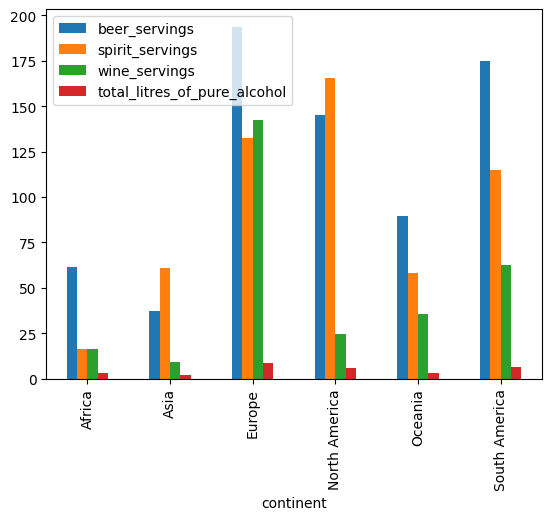

In [13]:
alcohol.groupby('continent').mean(numeric_only=True).plot(kind='bar')
plt.show()

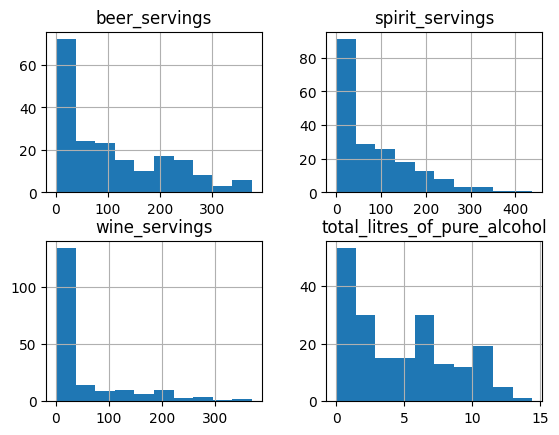

In [17]:
alcohol.hist()
plt.show()

Add country codes

In [19]:
!pip install pycountry
import pycountry

In [20]:
def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

In [21]:
alcohol['iso_code'] = alcohol['country'].apply(get_country_code)

In [22]:
alcohol.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,iso_code
61,France,127,151,370,11.8,Europe,FRA
136,Portugal,194,67,339,11.0,Europe,PRT
3,Andorra,245,138,312,12.4,Europe,AND
166,Switzerland,185,100,280,10.2,Europe,CHE
48,Denmark,224,81,278,10.4,Europe,DNK


In [27]:
continent_to_code = {
    'Africa': 'AF',
    'Asia': 'AS',
    'Europe': 'EU',
    'North America': 'NA',
    'South America': 'SA',
    'Oceania': 'OC',
    'Antarctica': 'AN'
}

# Apply mapping
alcohol['continent_code'] = alcohol['continent'].map(continent_to_code)

In [29]:
alcohol.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,iso_code,continent_code
61,France,127,151,370,11.8,Europe,FRA,EU
136,Portugal,194,67,339,11.0,Europe,PRT,EU
3,Andorra,245,138,312,12.4,Europe,AND,EU
166,Switzerland,185,100,280,10.2,Europe,CHE,EU
48,Denmark,224,81,278,10.4,Europe,DNK,EU
